## Import libraries and Dataset

In [140]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE STARTS RUNNING!')

In [141]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')

logger.info('LIBRARIES IMPORTED')

In [142]:
# Importing Data
CC_DF = pd.read_csv('UCI_Credit_Card.csv')

In [143]:
logger.info('DATA IMPORTED AND SAVING INTO PANDAS DATAFRAME!')

In [144]:
CC_DF.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


## EDA

In [145]:
logger.info('EDA STARTED')

In [146]:
print('Number of Columns - ',len(CC_DF.columns))
print('Names of columns - ',CC_DF.columns)

Number of Columns -  25
Names of columns -  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


There are 25(including ID) variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)


In [147]:
# ID is a uniqe and diffrent for customer to customr, So dropping it
CC_DF.drop('ID',axis=1,inplace=True)

In [148]:
# Lets see the basic information of the data
CC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

        > All the 24 column contains numbers with data type int or float
        > There are 30000 cutomer data
        > There 0 missing values in the data 

<function matplotlib.pyplot.show(close=None, block=None)>

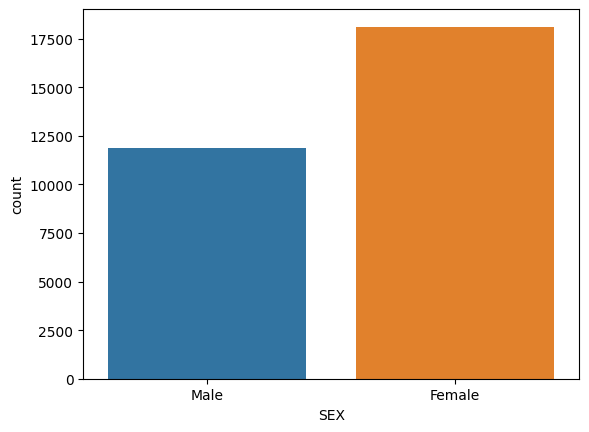

In [149]:
sns.countplot(x=CC_DF['SEX'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

> Compare to Male Female Creadit card users are more

<function matplotlib.pyplot.show(close=None, block=None)>

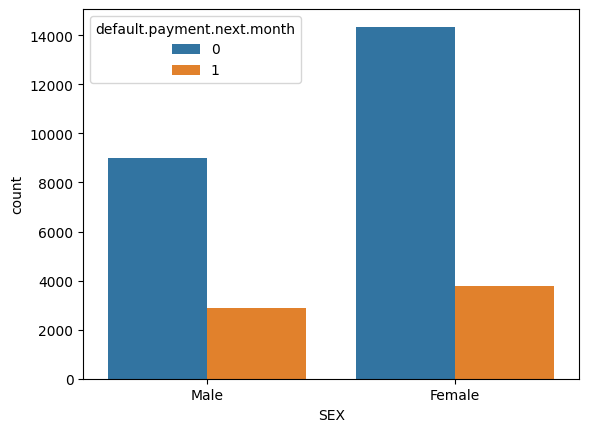

In [150]:
sns.countplot(x=CC_DF['SEX'],hue=CC_DF['default.payment.next.month'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

> Female are holding more credit cards then male but the defult is low compare to the male defaulters.
> Male are holding less number of card compare to female but the defaulters  rate is high

In [151]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
CC_DF['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [152]:
# As the marriage status will be married or not and there are 323+54 data which is coming under other, I will convert them to singal(2)
CC_DF['MARRIAGE']=CC_DF['MARRIAGE'].apply(lambda x : 2 if x >2 or x < 1 else x)

CC_DF['MARRIAGE'].value_counts()

<Axes: xlabel='MARRIAGE', ylabel='count'>

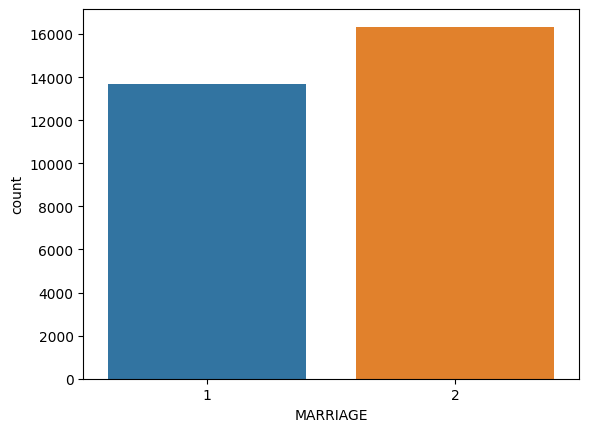

In [153]:
sns.countplot(x=CC_DF['MARRIAGE'])

Now both are almost equl

In [154]:
CC_DF.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [155]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [156]:
# As 5,6,0 are unknown I am consedaring under others
CC_DF['EDUCATION']=CC_DF['EDUCATION'].apply(lambda x : 4 if x >4 or x < 1 else x)

In [157]:
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

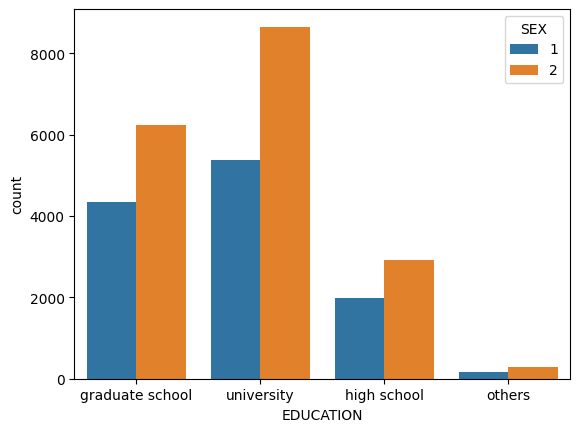

In [158]:
sns.countplot(x=CC_DF['EDUCATION'],hue=CC_DF['SEX'])
plt.xticks(ticks=[0,1,2,3],labels=['graduate school','university','high school','others'])
plt.show

From the above we can under stand Females are more aeducated then males

## Handling Outliers

In [159]:
logger.info('HANDALING OUTLIERS STARTS!')

In [160]:
CC_DF.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Limit Balance Column

skewness -  0.992866960519544


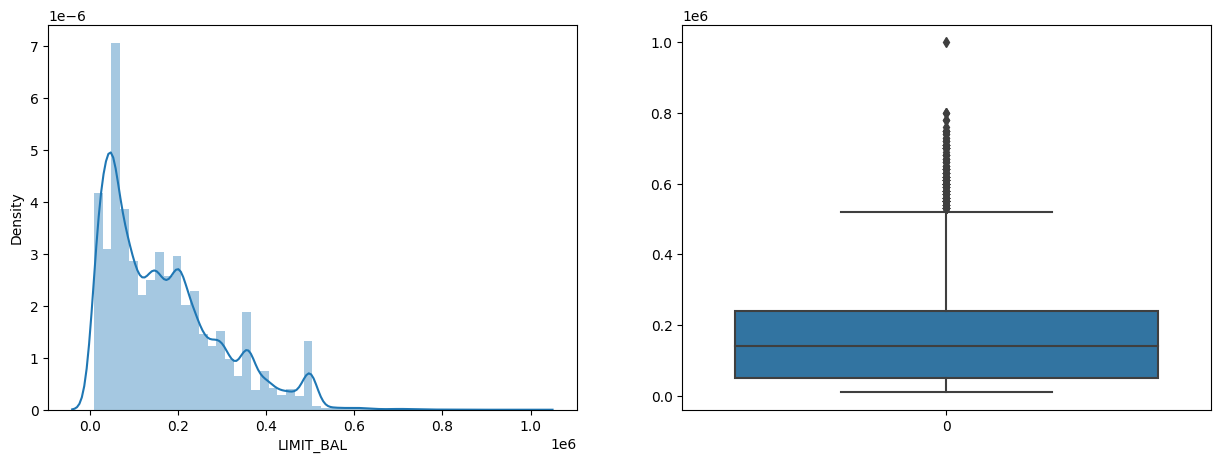

In [161]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

### OBSERVATIONS :
        > Limit balance column is skewed to the left and skewness is near to 1.
        > In box plot we can see there are outliers to be handeled.
        > We will handel the outliers by using quantiles due to the skewed data.
        
        > As we apply quantiles we loss big number of data, So instant of removeing outliers I will capp them at upper_limit

In [162]:
percentile25=CC_DF['LIMIT_BAL'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['LIMIT_BAL'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  50000.0 75th percentile -  240000.0
Upper Limit -  525000.0 Lower Limit -  -235000.0


In [163]:
CC_DF['LIMIT_BAL'] = np.where(CC_DF['LIMIT_BAL'] > upper_limit, upper_limit,
                 np.where(CC_DF['LIMIT_BAL'] < lower_limit, lower_limit,CC_DF['LIMIT_BAL']))

<function matplotlib.pyplot.show(close=None, block=None)>

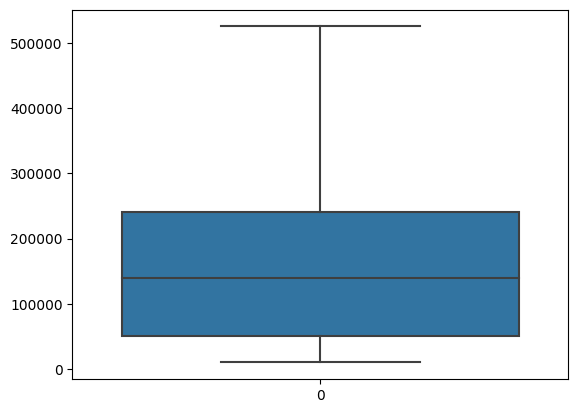

In [164]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['LIMIT_BAL'])
plt.show

All Outliers are capped according to the limits

#### Age Column

skewness -  0.7322458687830562


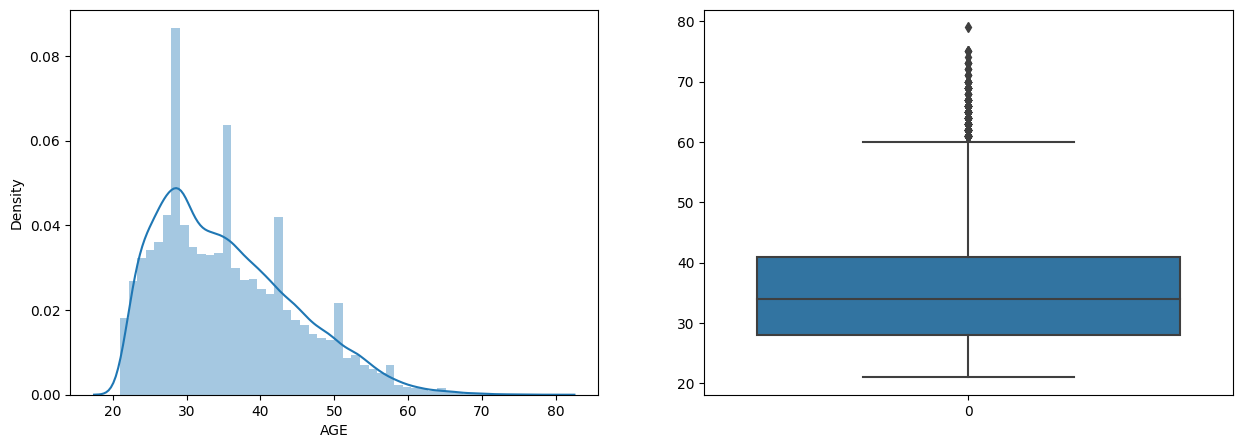

In [165]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['AGE'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['AGE'])

plt.show

print('skewness - ',CC_DF['AGE'].skew())

### OBSERVATIONS :
        > Age column is skewed to the left.
        > In box plot we can see there are outliers to be handeled.
        > We will handel the outliers by using quantiles due to the skewed data.
        
        > As we apply quantiles we loss big number of data, So instant of removeing outliers I will capp them at upper_limit

In [166]:
percentile25=CC_DF['AGE'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['AGE'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  28.0 75th percentile -  41.0
Upper Limit -  60.5 Lower Limit -  8.5


In [167]:
CC_DF['AGE'] = np.where(CC_DF['AGE'] > upper_limit, upper_limit,
                 np.where(CC_DF['AGE'] < lower_limit, lower_limit,CC_DF['AGE']))

<function matplotlib.pyplot.show(close=None, block=None)>

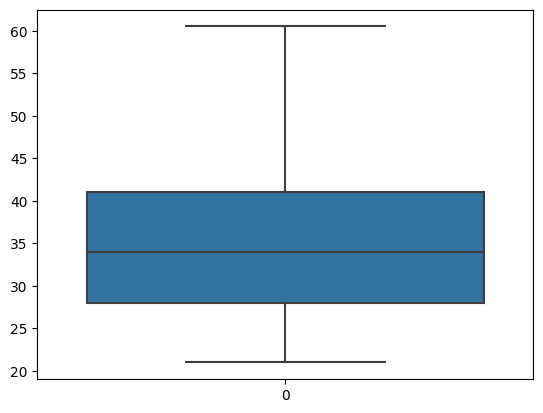

In [168]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['AGE'])
plt.show

In [169]:
CC_DF['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

skewness -  0.9045039681490943


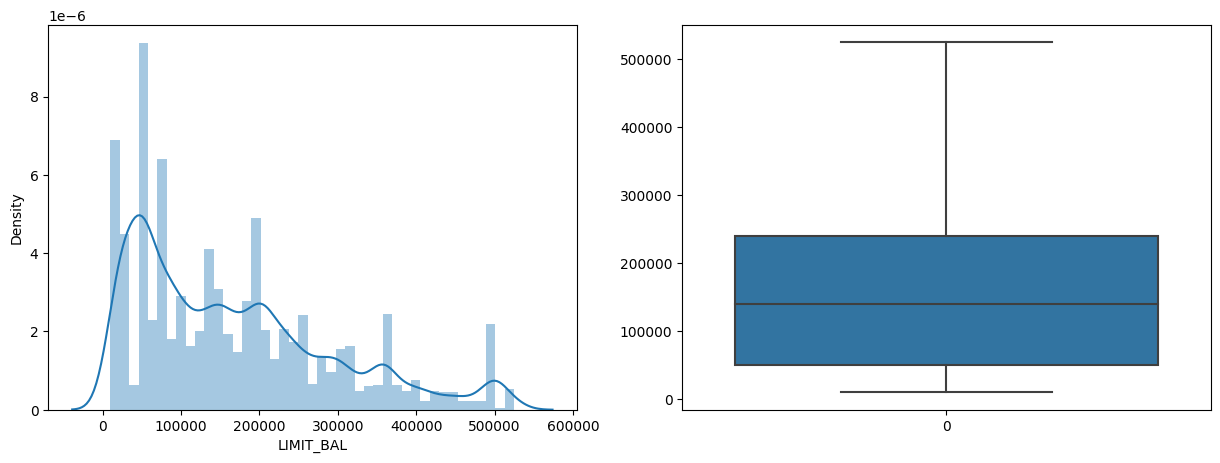

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

In [170]:
logger.info('HANDALING OUTLIERS ENDS!')

<function matplotlib.pyplot.show(close=None, block=None)>

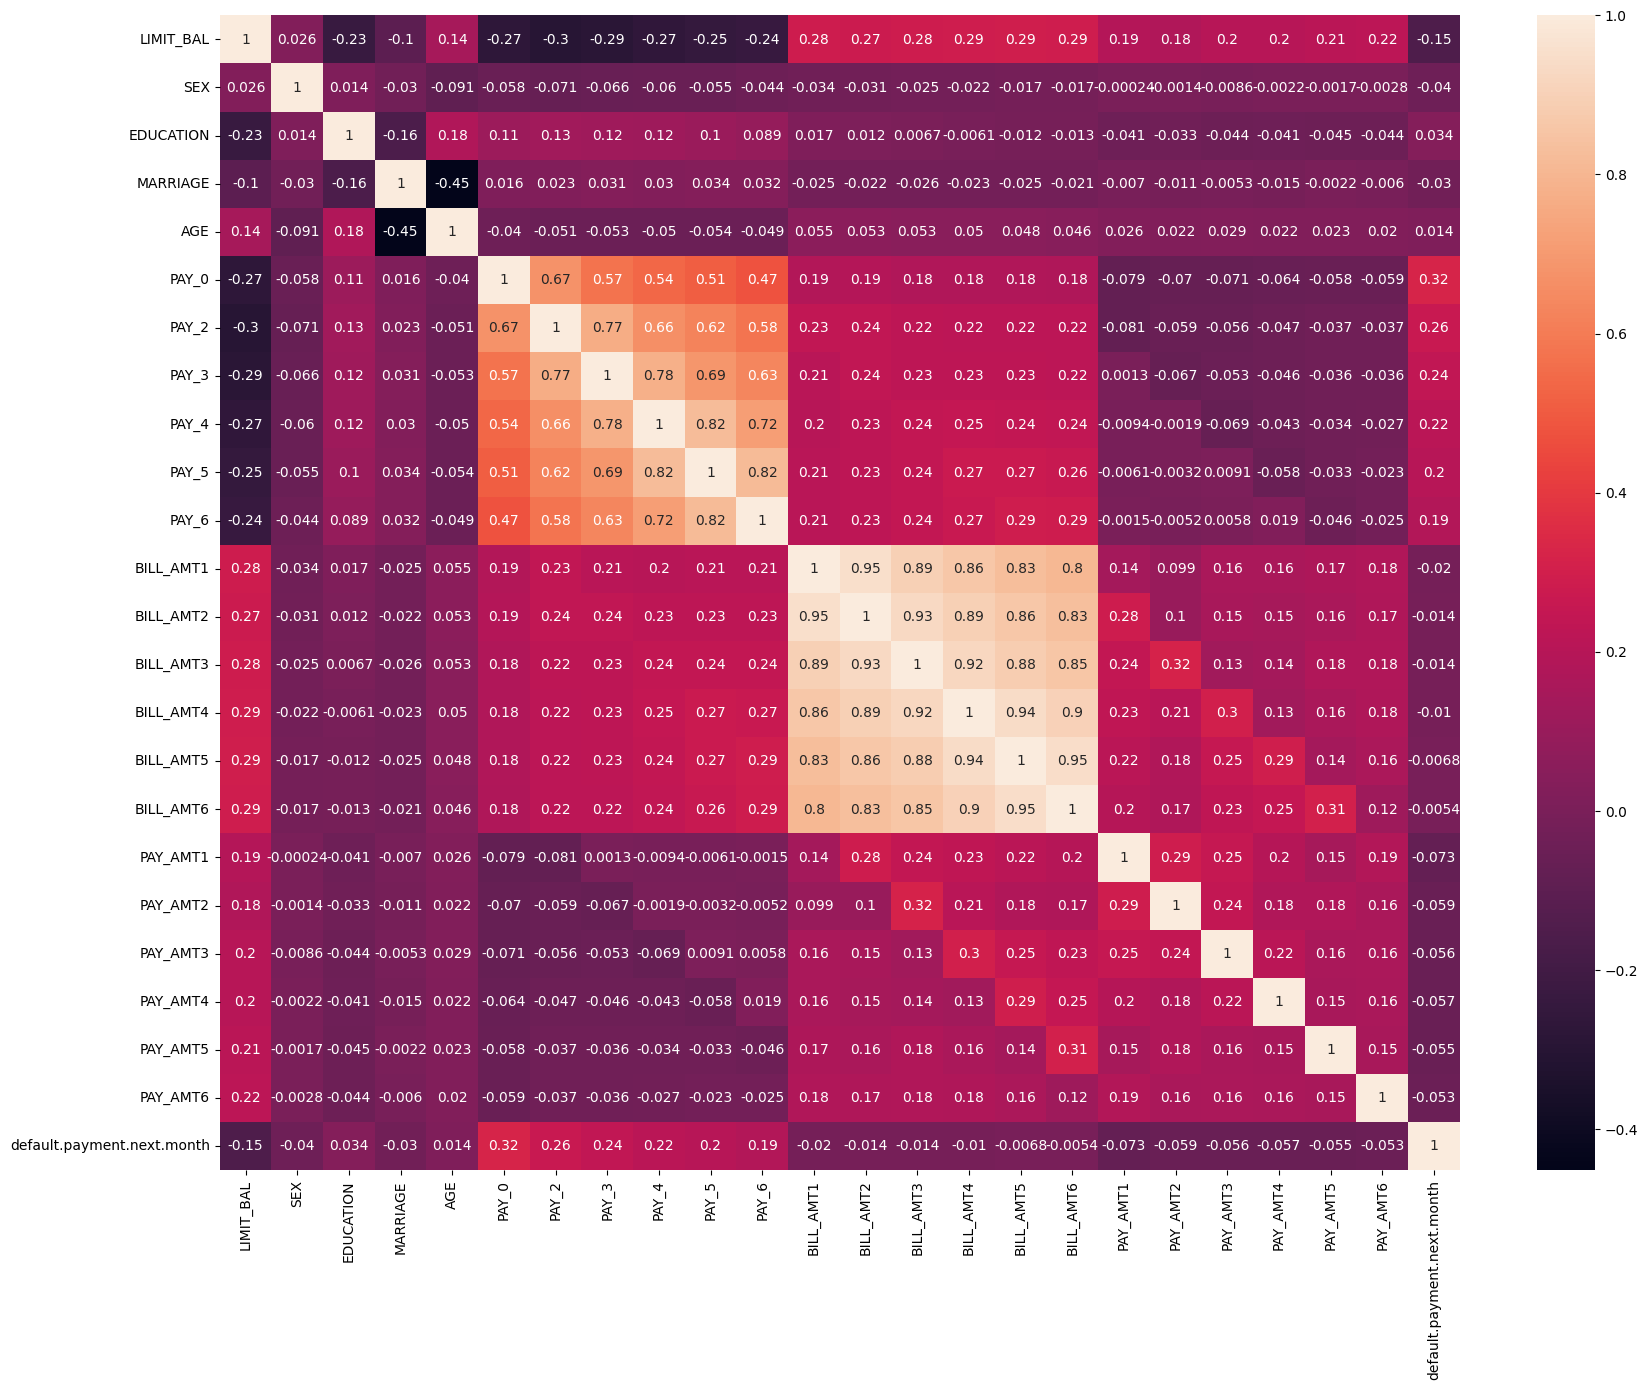

In [171]:
plt.figure(figsize=(20,15))
sns.heatmap(CC_DF.corr(),annot=True)
plt.show

In [172]:
logger.info('EDA ENDS!')

## Handeling Imbalnced Data

In [173]:
logger.info('HANDALING IMBALENCED DATA STARTS!')

In [174]:
print('Non Defaulter count - ',CC_DF['default.payment.next.month'].value_counts()[0])
print('Non Defaulter Precent - ',((CC_DF['default.payment.next.month'].value_counts()[0])/len(CC_DF))*100,' %')
print('Defaulter count - ',CC_DF['default.payment.next.month'].value_counts()[1])
print('Defaulter Precent - ',((CC_DF['default.payment.next.month'].value_counts()[1])/len(CC_DF))*100,' %')

Non Defaulter count -  23364
Non Defaulter Precent -  77.88000000000001  %
Defaulter count -  6636
Defaulter Precent -  22.12  %


<Axes: xlabel='default.payment.next.month', ylabel='count'>

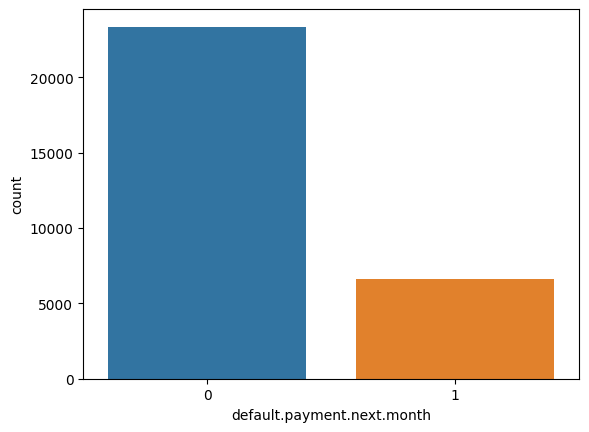

In [175]:
sns.countplot(x=CC_DF['default.payment.next.month'])

    > We can see it is an imbalance data set with 22% Defaulters and 78% Non-Defaulters
    > To handel this we have to use Under or Over Sampling

## Over Sampling

In [176]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING STARTS!')

In [177]:
# Initialise SMOTE object
smote = SMOTE()

In [178]:
# Separate independent and dependent variables
X = CC_DF.drop('default.payment.next.month',axis=1)
y = CC_DF['default.payment.next.month']

In [179]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [180]:
# Combine balanced X and y
CC_DF_final = pd.DataFrame(x_smote, columns=CC_DF.columns[:-1])
CC_DF_final['default'] = y_smote

CC_DF_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [181]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING ENDS!')

<Axes: xlabel='default', ylabel='count'>

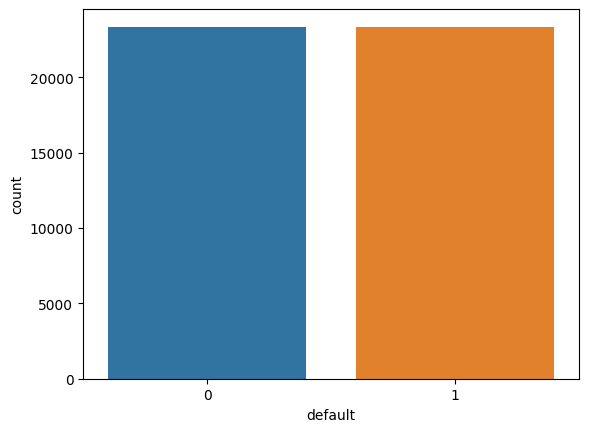

In [182]:
sns.countplot(x=CC_DF_final['default'])

Now data set is balanced

In [183]:
logger.info('HANDALING IMBALENCED DATA ENDS!')

## Splitting

In [184]:
logger.info('DATA PREPARING FOR MODELING STARTS!')

In [185]:
X = CC_DF_final.drop('default',axis=1)
y = CC_DF_final['default']

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [187]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
37126,100000.000000,1,1,2,29.860189,-1,-1,-1,-1,0,...,869.467471,1300.700143,1244.147628,644.787315,869.467471,869.467471,1300.700143,882.672043,644.787315,644.787315
4990,20000.000000,1,1,2,32.000000,0,0,0,3,2,...,17575.000000,17063.000000,15711.000000,28600.000000,3276.000000,3000.000000,3.000000,7.000000,2058.000000,669.000000
7273,180000.000000,2,2,1,32.000000,0,0,0,0,-2,...,17987.000000,-99.000000,-99.000000,-99.000000,5000.000000,15000.000000,0.000000,0.000000,0.000000,13550.000000
15568,100000.000000,1,2,2,40.000000,0,0,0,0,0,...,60737.000000,66077.000000,68990.000000,70724.000000,15037.000000,5003.000000,8058.000000,8000.000000,3000.000000,5000.000000
45464,30000.000000,1,1,1,25.777058,0,0,2,2,2,...,27471.274053,27901.134366,27174.873959,28773.169286,3304.322387,1611.485893,1170.860313,0.000000,2173.992829,28.241213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,190000.000000,1,2,1,48.000000,0,-1,0,0,0,...,189018.000000,175871.000000,157218.000000,151618.000000,189717.000000,7779.000000,6092.000000,5018.000000,6168.000000,1218.000000
45891,70000.000000,2,1,1,34.123008,1,2,1,0,0,...,19122.733972,19919.064907,21840.606692,21349.360675,1711.232031,202.137578,1376.684220,2277.434711,0.000000,822.031869
42613,51077.658131,2,2,2,24.431063,0,0,0,1,1,...,9733.241090,8130.240561,7210.301233,16149.581986,20548.782632,3568.936747,166.954574,2749.228953,18030.107682,4366.437138
43567,20000.000000,1,1,1,27.986302,0,0,0,0,0,...,1422.754104,4657.054946,6087.218840,3482.137001,2027.616462,697.575400,3990.191360,1815.068334,324.657555,3537.644012


### Scaling the data

In [188]:
scaler = StandardScaler()

In [189]:
X_train_scaled = scaler.fit_transform(X_train)

In [190]:
logger.info('DATA PREPARING FOR MODELING ENDS!')

## Model Building 

In [191]:
logger.info('MODELING STARTS!')

In [192]:
# Helper Function for printing Accuracy matrices, plotting Confusiuon matrix and ROC curve

def helper(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

### 1. Logistic Regression

In [193]:
logger.info('MODEL - LOGISTIC REGRESSION STARTS!')

In [194]:
LogR = LogisticRegression()

In [195]:
LogR.fit(X_train_scaled,y_train)

LogisticRegression()

In [196]:
X_test_scaled = scaler.transform(X_test)


Training Accuracy Score:  0.724133995320436
Testing Accuracy Score:  0.7164869029275809
Precision on test data:  0.7193816884661117
Recall on test data:  0.7184054283290925
F1 score on test data:  0.7188932269563741

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.73      0.72      0.73     17717
           1       0.72      0.73      0.72     17329

    accuracy                           0.72     35046
   macro avg       0.72      0.72      0.72     35046
weighted avg       0.72      0.72      0.72     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5795
           1       0.72      0.72      0.72      5887

    accuracy                           0.72     11682
   macro avg       0.72      0.72      0.72     11682
weighted avg       0.72      0.72      0.72     11682




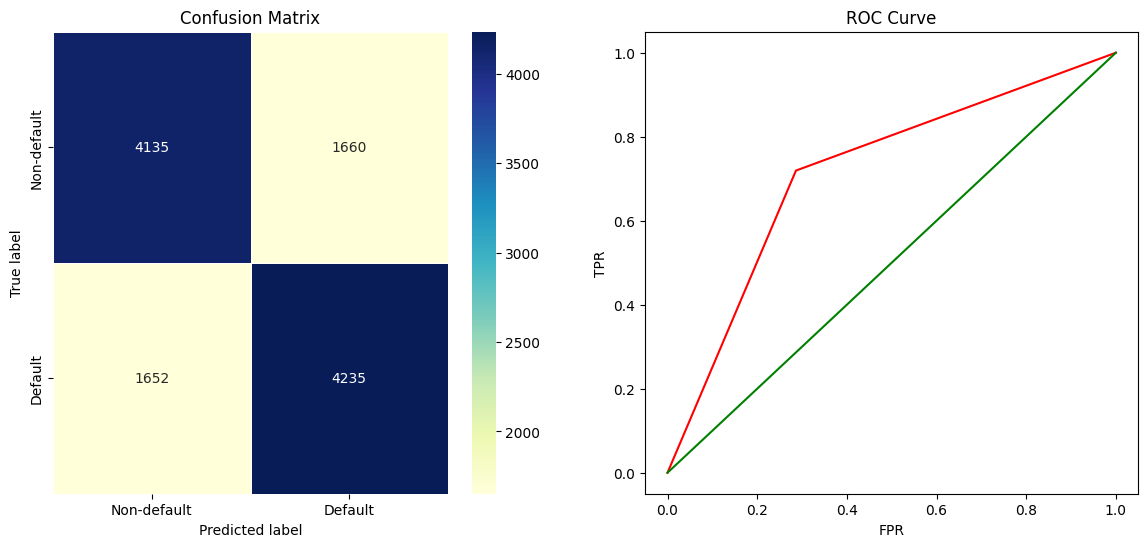

{'Train accuracy': 0.724133995320436,
 'Test accuracy': 0.7164869029275809,
 'Precision': 0.7193816884661117,
 'Recall': 0.7184054283290925,
 'F1 Score': 0.7188932269563741}

In [197]:
helper(LogR,X_train_scaled,y_train,X_test_scaled, y_test)

In [198]:
logger.info('MODEL - LOGISTIC REGRESSION ENDS!')

### 2. Decicion Tree

In [199]:
logger.info('MODEL - DECICION TREE STARTS!')

In [200]:
D_tree = DecisionTreeClassifier()

In [201]:
D_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()


Training Accuracy Score:  0.9996575928779319
Testing Accuracy Score:  0.7443930833761342
Precision on test data:  0.7413306786129086
Recall on test data:  0.757930449533503
F1 score on test data:  0.7495386680087235

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17589
           1       1.00      1.00      1.00     17457

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5655
           1       0.76      0.74      0.75      6027

    accuracy                           0.74     11682
   macro avg       0.74      0.74      0.74     11682
weighted avg       0.74      0.74      0.74     11682




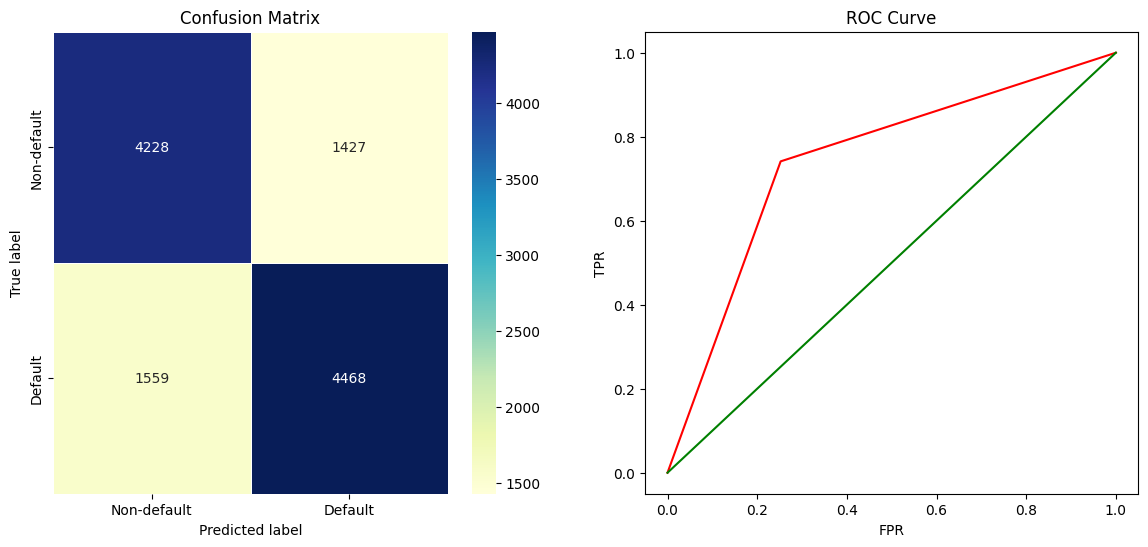

{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.7443930833761342,
 'Precision': 0.7413306786129086,
 'Recall': 0.757930449533503,
 'F1 Score': 0.7495386680087235}

In [202]:
helper(D_tree,X_train_scaled,y_train,X_test_scaled,y_test)

In [203]:
logger.info('MODEL - DECICION TREE ENDS!')

### 3. Random Forest

In [204]:
logger.info('MODEL - RANDOM FOREST STARTS!')

In [205]:
RF = RandomForestClassifier()

In [206]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996575928779319
Testing Accuracy Score:  0.8406094846772812
Precision on test data:  0.8564610217429733
Recall on test data:  0.821882951653944
F1 score on test data:  0.8388157894736842

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17583
           1       1.00      1.00      1.00     17463

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6025
           1       0.82      0.86      0.84      5657

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




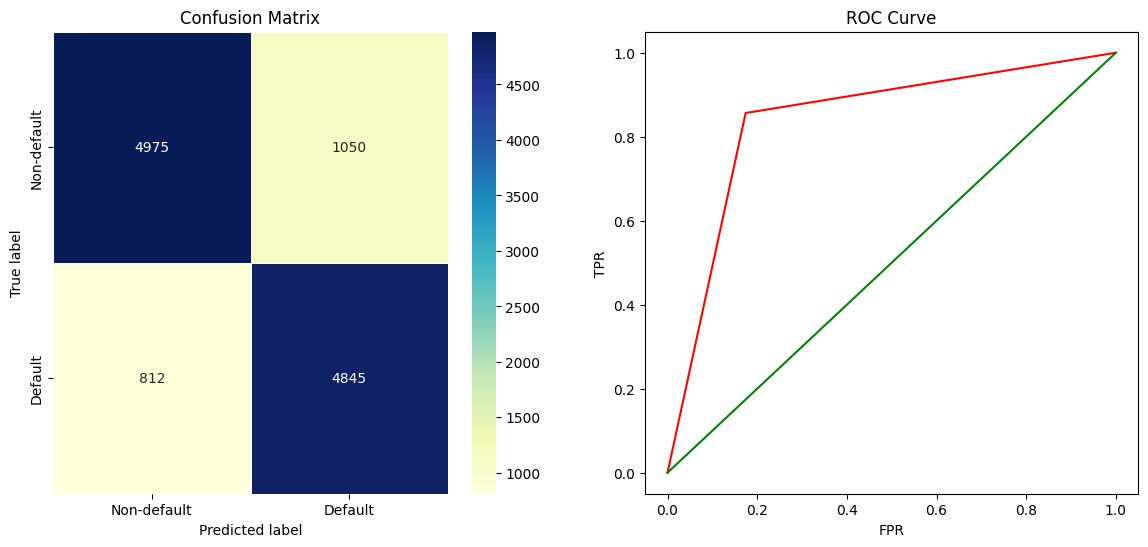

{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.8406094846772812,
 'Precision': 0.8564610217429733,
 'Recall': 0.821882951653944,
 'F1 Score': 0.8388157894736842}

In [207]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
logger.info('MODEL - RANDOM FOREST ENDS!')

### 4. Support Vector Machine

In [ ]:
logger.info('MODEL - SUPPORT VECTOR MACHINE STARTS!')

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train_scaled,y_train)

In [ ]:
helper(svm,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
logger.info('MODEL - SUPPORT VECTOR MACHINE ENDS!')

In [ ]:
model={'Logistic Regression':{'Train accuracy': 0.7238201221252069,
 'Test accuracy': 0.714261256634138,
 'Precision': 0.7172472387425658,
 'Recall': 0.716030534351145,
 'F1 Score': 0.7166383701188456},'Decicion Tree':{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.7574045540147235,
 'Precision': 0.7573566504119724,
 'Recall': 0.7640373197625105,
 'F1 Score': 0.7606823171761525},'Random Forest':{'Train accuracy': 0.9995719910974148,
 'Test accuracy': 0.8413799007019346,
 'Precision': 0.8594806118818926,
 'Recall': 0.8196776929601357,
 'F1 Score': 0.8391074064426501},'SVC':{'Train accuracy': 0.7722136620441705,
 'Test accuracy': 0.7546652970381784,
 'Precision': 0.7730304669190553,
 'Recall': 0.7273960983884648,
 'F1 Score': 0.7495193148051039}}

In [ ]:
model=pd.DataFrame(model)

In [ ]:
model

    All model Accuracy was good but Decicion Tree and Random Forest was to good
    Decicion Tree vs Random Frorest
        > Both training accuracy was good but Random Forest test accuracy was also high
        > F1 Score is also high for Random Forest 
        > So i will go with Random Forest

In [ ]:
logger.info('MODELING ENDS!')

## Feature Engineering

In [ ]:
logger.info('FEATURE ENGINEERING STARTS!')

In [ ]:
CC_DF_FE = CC_DF_final.copy()

In [ ]:
CC_DF_FE

In [ ]:
CC_DF_FE.columns

#### AVG_BILL_AMT (creating new column)

In [ ]:
CC_DF_FE['AVG_BILL_AMT']=(CC_DF_FE['BILL_AMT1']+CC_DF_FE['BILL_AMT2']+CC_DF_FE['BILL_AMT3']+CC_DF_FE['BILL_AMT4']+CC_DF_FE['BILL_AMT5']+CC_DF_FE['BILL_AMT6']/6)

#### AVG_PAY_AMT (creating new column)

In [ ]:
CC_DF_FE['AVG_PAY_AMT']=(CC_DF_FE['PAY_0']+CC_DF_FE['PAY_2']+CC_DF_FE['PAY_3']+CC_DF_FE['PAY_4']+CC_DF_FE['PAY_5']+CC_DF_FE['PAY_6']/6)

In [ ]:
CC_DF_FE.tail()

In [ ]:
X=CC_DF_FE.drop('default',axis=1)
y=CC_DF_FE['default']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
RF.fit(X_train_scaled,y_train)

In [ ]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
model['Random Forest with AVG_BILL']=[0.9996290589510929,0.8415511042629686,0.857646229739253,0.8235493148367451,0.8402520065590748]
model['Random Forest with AVG_PAY']=[0.9996861268047709,0.837527820578668,0.8543620598124225,0.8178892088768422,0.8357278864462524]

In [ ]:
logger.info('FEATURE ENGINEERING ENDS!')

In [ ]:
model.apply(lambda x:x*100)

    Feature Enginering
        > After creating new column Average Bill Amount it healped model F1 score.
        > Average Pay Amount was not helpful it actule draged down the F1 Score to 83.5%
        > So I will continue with AVG_BILL and Drop AVG_PAY column

# Final model training with Random Forest and new column AVG_BILL

In [ ]:
logger.info('FINAL MODEL BUILDING STARTS!')

In [ ]:
CC_DF_final.head()

In [ ]:
CC_DF_final['AVG_BILL_AMT']=(CC_DF_final['BILL_AMT1']+CC_DF_final['BILL_AMT2']+CC_DF_final['BILL_AMT3']+CC_DF_final['BILL_AMT4']+CC_DF_final['BILL_AMT5']+CC_DF_final['BILL_AMT6']/6)

In [ ]:
CC_DF_final.tail()

In [ ]:
X=CC_DF_final.drop('default',axis=1)
y=CC_DF_final['default']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
RF_F=RandomForestClassifier()

In [ ]:
RF_F.fit(X_train_scaled,y_train)

In [ ]:
helper(RF_F,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
fin_m=({'Scores':{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.8425783256291731,
 'Precision': 0.859192348565356,
 'Recall': 0.8229007633587786,
 'F1 Score': 0.8406550558877048}})
final_model= pd.DataFrame(fin_m)

In [ ]:
final_model

In [ ]:
logger.info(final_model)

In [ ]:
logger.info('FINAL MODEL BUILDING ENDS!')

## Saving the file

In [ ]:
logger.info('SAVING THE MODEL...')

In [ ]:
pickle.dump(RF_F, open('ccdp.pkl', 'wb'))

logger.info('MODEL SAVED!')

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

#### Compress the model.pkl, to easy the process of deployement

In [ ]:
import bz2 as bz2

In [ ]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [ ]:
compressed_pickle('ccdp', RF_F)

In [ ]:
logger.info('PROJECT RUNNING ENDS!')